# Exercise 4

### Necessary imports

In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

### Dataset loading

In [2]:
directory = 'dataset/20_NGs_400'
list_of_vectors = []
target = []
target_names = []
i = 0

for filenames in os.listdir(directory):
    for file in os.listdir(directory + "/" + filenames):
        f = open(directory + "/" + filenames + "/" + file, "r")
        target.append(i)
        list_of_vectors.append(f.read())
    target_names.append(filenames)
    i += 1

### Creating the FVM with CountVectorizer

In [25]:
vectorizer = CountVectorizer(stop_words='english')
vectors_dataset_count = vectorizer.fit_transform(list_of_vectors)

vectorizer = CountVectorizer(stop_words='english',ngram_range=(5,5))
vectors_dataset_count_ngram = vectorizer.fit_transform(list_of_vectors)

vectorizer = TfidfVectorizer(stop_words='english')
vectors_dataset_tfidf = vectorizer.fit_transform(list_of_vectors)

vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(5,5))
vectors_dataset_tfidf_ngram = vectorizer.fit_transform(list_of_vectors)

In [4]:
def count_doc_positives(target: list, target_class: int) -> int:
    return target.count(target_class)

### Defining the rocchio method for obtaining the vector of features for each classes

In [5]:
def rocchio_method(train: list, target: list, num_class: int, beta: int, gamma: int) -> list:
    profiles = []
    for i in range(num_class):
        pos = []
        neg = []
        pos_word_num = []
        neg_word_num = []
        for index, x in enumerate(train):
            if(target[index] == i):
                pos.append(x)
            else:
                neg.append(x)
    
        positive_examples = count_doc_positives(target, i)
        negative_examples = len(target) - positive_examples
        
        pos_word_num = np.array([sum(x) for x in zip(*pos)]) / positive_examples
        neg_word_num = np.array([sum(x) for x in zip(*neg)]) / negative_examples

        profiles.append((beta * pos_word_num) - (gamma * neg_word_num))
    return profiles

### Defining the function for predicting the class of a document, comparing the cosine similarity of the document with the vectors of profiles given by Rocchio Method

In [6]:
def predict_rocchio(profiles: list, test: list) -> list:
    predictions = []

    for x in test:
        best_similarity = 100000
        best_vector = None
        for index, profile in enumerate(profiles):
            similarity = distance.cosine(x, profile)
            if(similarity < best_similarity):
                best_similarity = similarity
                best_vector = index
        predictions.append(best_vector)
    return predictions

### Splitting the dataset into training and test set and getting the profiles with Rocchio Method and the predictions for the test set. After that, we calculate the accuracy with dataset provided by the CountVectorizer and the accuracy with the dataset provided by the TfidfVectorizer

In [17]:
# CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(vectors_dataset_count.toarray(), target, test_size=0.1, random_state=42)
profiles = rocchio_method(X_train, y_train, len(target_names), 16, 8)
predictions_count = predict_rocchio(profiles, X_test)

# I calculate the accuracy, f1, precision and recall score for a single fold
print("--------------------")
print("CountVectorizer")
print("Accuracy Score: ", accuracy_score(y_test, predictions_count))
print("Precision Score: ", precision_score(y_test, predictions_count, average='macro'))
print("Recall Score: ", recall_score(y_test, predictions_count, average='macro'))
print("F1 Score: ", f1_score(y_test, predictions_count, average='macro'))
print("--------------------")

--------------------
CountVectorizer
Accuracy Score:  0.475
Precision Score:  0.475
Recall Score:  0.42833333333333334
F1 Score:  0.406991341991342
--------------------


In [27]:
# CountVectorizer_ngram

X_train, X_test, y_train, y_test = train_test_split(vectors_dataset_count_ngram.toarray(), target, test_size=0.1, random_state=42)
profiles = rocchio_method(X_train, y_train, len(target_names), 16, 8)
predictions_count_ngram = predict_rocchio(profiles, X_test)

# I calculate the accuracy, f1, precision and recall score for a single fold
print("--------------------")
print("CountVectorizer_ngram")
print("Accuracy Score: ", accuracy_score(y_test, predictions_count))
print("Precision Score: ", precision_score(y_test, predictions_count, average='macro'))
print("Recall Score: ", recall_score(y_test, predictions_count, average='macro'))
print("F1 Score: ", f1_score(y_test, predictions_count, average='macro'))
print("--------------------")

--------------------
CountVectorizer_ngram
Accuracy Score:  0.475
Precision Score:  0.475
Recall Score:  0.42833333333333334
F1 Score:  0.406991341991342
--------------------


In [18]:
# TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(vectors_dataset_tfidf.toarray(), target, test_size=0.1, random_state=42)
profiles = rocchio_method(X_train, y_train, len(target_names), 16, 8)
predictions_tfidf = predict_rocchio(profiles, X_test)

# I calculate the accuracy, f1, precision and recall score for a single fold
print("--------------------")
print("TfidfVectorizer")
print("Accuracy Score: ", accuracy_score(y_test, predictions_tfidf))
print("Precision Score: ", precision_score(y_test, predictions_tfidf, average='macro'))
print("Recall Score: ", recall_score(y_test, predictions_tfidf, average='macro'))
print("F1 Score: ", f1_score(y_test, predictions_tfidf, average='macro'))
print("--------------------")

--------------------
TfidfVectorizer
Accuracy Score:  0.625
Precision Score:  0.5883333333333333
Recall Score:  0.5408333333333333
F1 Score:  0.5166666666666666
--------------------


In [21]:
# TfidfVectorizer_ngram

X_train, X_test, y_train, y_test = train_test_split(vectors_dataset_tfidf_ngram.toarray(), target, test_size=0.1, random_state=42)
profiles = rocchio_method(X_train, y_train, len(target_names), 16, 8)
predictions_tfidf_ngram = predict_rocchio(profiles, X_test)

# I calculate the accuracy, f1, precision and recall score for a single fold
print("--------------------")
print("TfidfVectorizer whit n-gram")
print("Accuracy Score: ", accuracy_score(y_test, predictions_tfidf))
print("Precision Score: ", precision_score(y_test, predictions_tfidf, average='macro'))
print("Recall Score: ", recall_score(y_test, predictions_tfidf, average='macro'))
print("F1 Score: ", f1_score(y_test, predictions_tfidf, average='macro'))
print("--------------------")

--------------------
TfidfVectorizer whit n-gram
Accuracy Score:  0.375
Precision Score:  0.3683574879227053
Recall Score:  0.30000000000000004
F1 Score:  0.2879527879527879
--------------------


### Plotting the confusion matrix of the test set for the CountVectorizer and the TfidfVectorizer

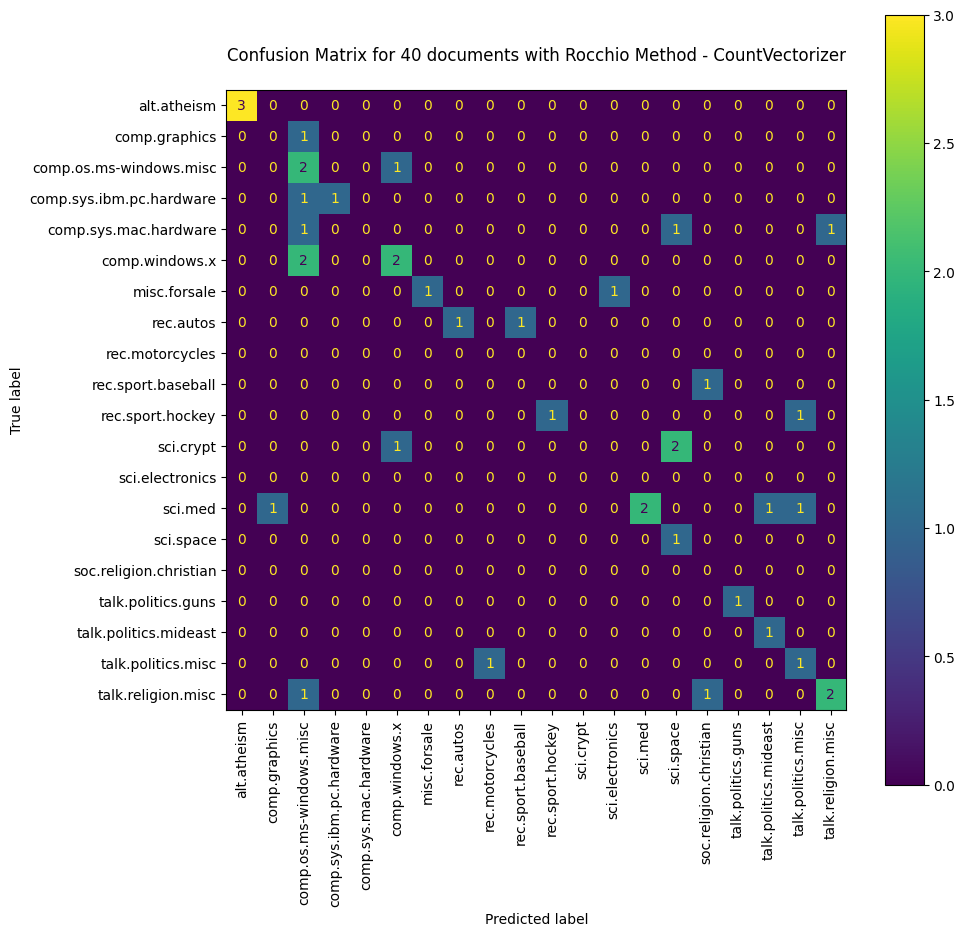

In [25]:
# CountVectorizer Confusion Matrix

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(y_test, predictions_count, ax=ax, labels=[x for x in range(20)], display_labels=target_names, xticks_rotation='vertical')
_ = ax.set_title(
    f"Confusion Matrix for {len(y_test)} documents with Rocchio Method - CountVectorizer\n"
)

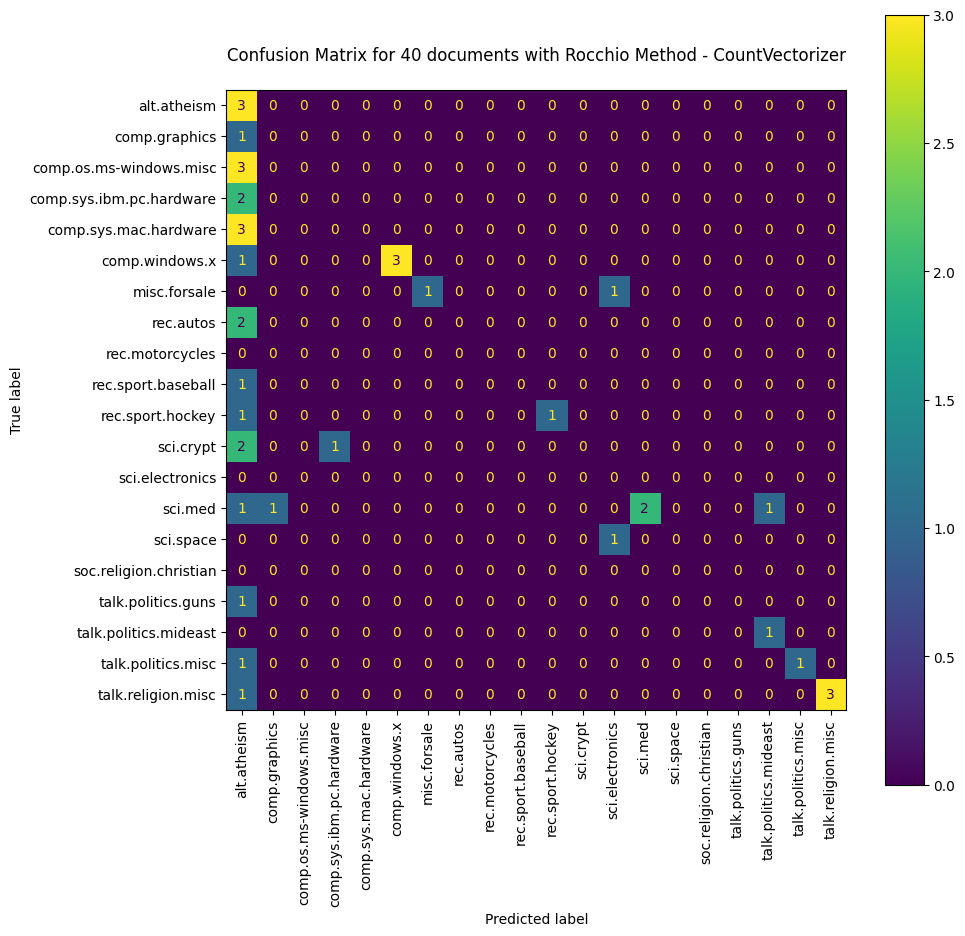

In [28]:
# CountVectorizer_ngram Confusion Matrix

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(y_test, predictions_count_ngram, ax=ax, labels=[x for x in range(20)], display_labels=target_names, xticks_rotation='vertical')
_ = ax.set_title(
    f"Confusion Matrix for {len(y_test)} documents with Rocchio Method - CountVectorizer\n"
)

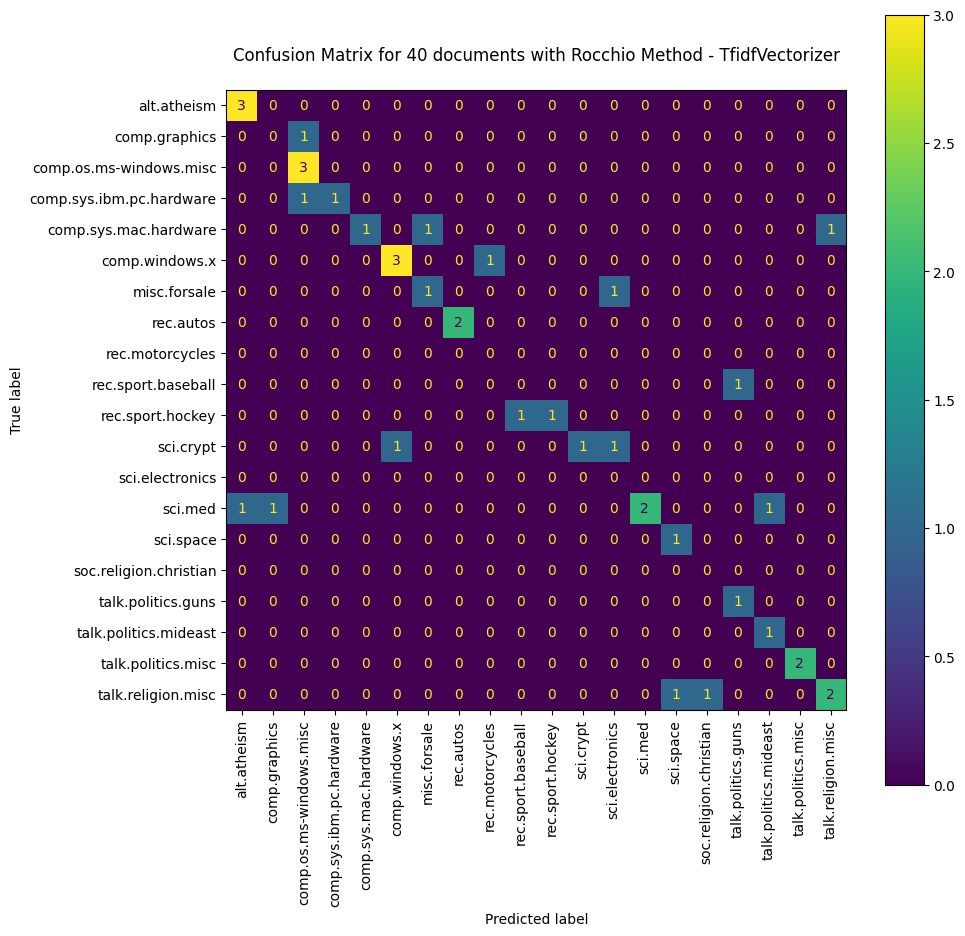

In [26]:
# TfidfVectorizer Confusion Matrix

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(y_test, predictions_tfidf, ax=ax, labels=[x for x in range(20)], display_labels=target_names, xticks_rotation='vertical')
_ = ax.set_title(
    f"Confusion Matrix for {len(y_test)} documents with Rocchio Method - TfidfVectorizer\n"
)

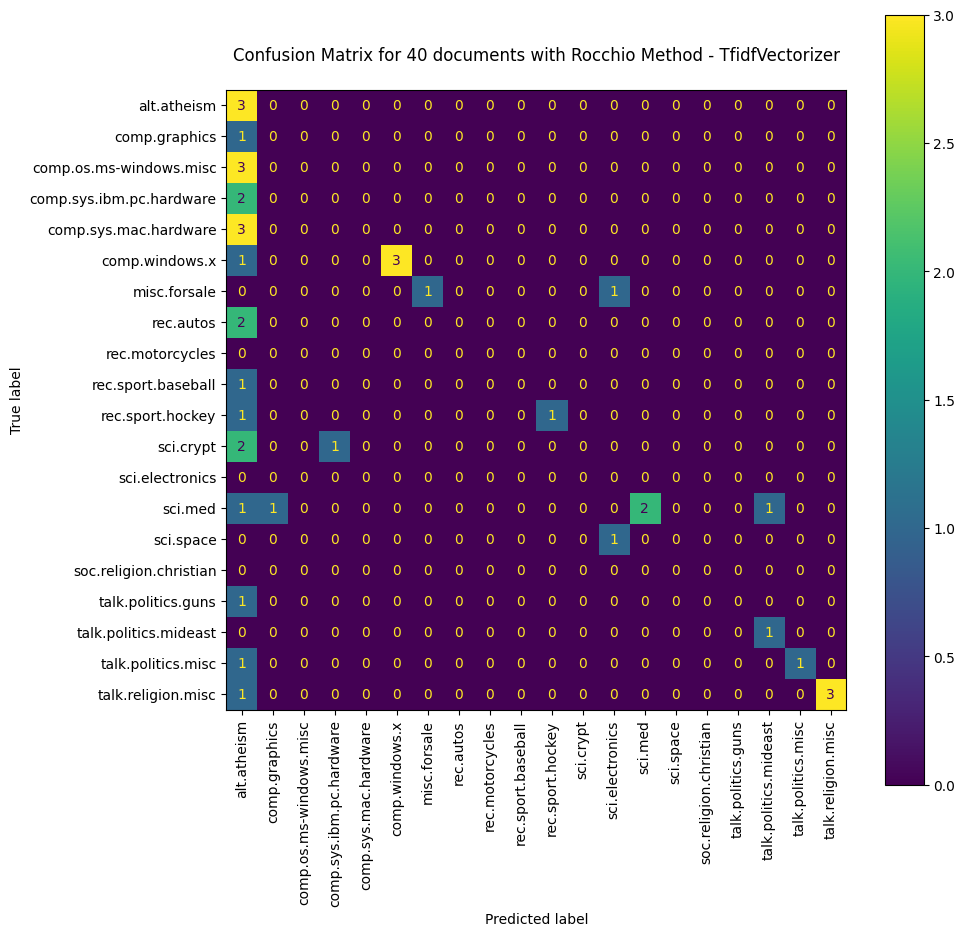

In [22]:
# TfidfVectorizer_ngram Confusion Matrix

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(y_test, predictions_tfidf_ngram, ax=ax, labels=[x for x in range(20)], display_labels=target_names, xticks_rotation='vertical')
_ = ax.set_title(
    f"Confusion Matrix for {len(y_test)} documents with Rocchio Method - TfidfVectorizer\n"
)

### Implementing the cross validation for the dataset with 10 folds and getting the mean accuracy

We did some testing and realized that the best value for parameter beta is 16 and the best value for parameter gamma is 8.

In [29]:
accuracy_scores_count = []
f1_scores_count = []
precision_scores_count = []
recall_scores_count = []

accuracy_scores_tfidf = []
f1_scores_tfidf = []
precision_scores_tfidf = []
recall_scores_tfidf = []

accuracy_scores_tfidf_ngram = []
f1_scores_tfidf_ngram = []
precision_scores_tfidf_ngram = []
recall_scores_tfidf_ngram = []

for i in random.sample(range(0, 10000), 10):
    # CountVectorizer
    X_train, X_test, y_train, y_test = train_test_split(vectors_dataset_count.toarray(), target, test_size=0.1, random_state=i)
    profiles = rocchio_method(X_train, y_train, 20, 16, 8)
    predict_value = predict_rocchio(profiles, X_test)
    accuracy_scores_count.append(accuracy_score(y_test, predict_value))
    f1_scores_count.append(f1_score(y_test, predict_value, average='macro'))
    precision_scores_count.append(precision_score(y_test, predict_value, average='macro'))
    recall_scores_count.append(recall_score(y_test, predict_value, average='macro'))

    # TfidfVectorizer
    X_train, X_test, y_train, y_test = train_test_split(vectors_dataset_tfidf.toarray(), target, test_size=0.1, random_state=i)
    profiles = rocchio_method(X_train, y_train, 20, 16, 8)
    predict_value = predict_rocchio(profiles, X_test)
    accuracy_scores_tfidf.append(accuracy_score(y_test, predict_value))
    f1_scores_tfidf.append(f1_score(y_test, predict_value, average='macro'))
    precision_scores_tfidf.append(precision_score(y_test, predict_value, average='macro'))
    recall_scores_tfidf.append(recall_score(y_test, predict_value, average='macro'))


print("--------------------")
print("CountVectorizer")
print("Mean Accuracy Score: ", np.mean(accuracy_scores_count))
print("Mean Precision Score: ", np.mean(precision_scores_count))
print("Mean Recall Score: ", np.mean(recall_scores_count))
print("Mean F1 Score: ", np.mean(f1_scores_count))
print("--------------------")
print("TfidfVectorizer")
print("Mean Accuracy Score: ", np.mean(accuracy_scores_tfidf))
print("Mean Precision Score: ", np.mean(precision_scores_tfidf))
print("Mean Recall Score: ", np.mean(recall_scores_tfidf))
print("Mean F1 Score: ", np.mean(f1_scores_tfidf))
print("--------------------")

--------------------
CountVectorizer
Mean Accuracy Score:  0.5575
Mean Precision Score:  0.4763973127262601
Mean Recall Score:  0.5175151072124755
Mean F1 Score:  0.4585920075700777
--------------------
TfidfVectorizer
Mean Accuracy Score:  0.6699999999999999
Mean Precision Score:  0.6018023531049846
Mean Recall Score:  0.6200282651072124
Mean F1 Score:  0.5783652797819464
--------------------
